Análise e Otimização do Consumo de Energia Residencial por Ambiente



1. Introdução

Objetivo:

entender o consumo de energia elétrica em residências dividido por cômodos e identificar padrões para otimizar uso e reduzir desperdícios.

Importância:

energia é um dos maiores custos fixos, e uma gestão eficiente traz economia financeira e ambiental.

Dados:

consumo diário por cômodo (quartos, sala, cozinha, piscina) e consumo total (KW/H) em 211 dias.

2. Metodologia


Análise exploratória:

estudamos dados de consumo por cômodo, identificando médias, variações e perfis típicos.

Clusterização:

agrupamos residências em clusters de consumo (baixo, equilibrado, alto) para personalizar recomendações.

Modelagem preditiva:

construímos um modelo de regressão linear para prever o consumo total a partir do consumo individual de cada cômodo.

Avaliação:

medimos desempenho do modelo com métricas MAE e R² para garantir previsões confiáveis.

Recomendações:

baseadas nos clusters, sugerimos ações práticas para cada perfil.

3. Resultados e Análise

Clusterização:

identificamos 3 grupos principais:

Baixo consumo — residências com consumo controlado e eficiente.

Consumo equilibrado — consumo médio com algumas áreas elevadas.

Alto consumo — consumo elevado, especialmente em sala, cozinha ou piscina.

Modelo de regressão linear: R² de 0,86 indica alta capacidade preditiva.

Sala tem maior impacto no consumo total.

Análise temporal:

identificamos picos e sazonalidades para futuras intervenções programadas.

4. Conclusões de Ciência de Dados


Os dados possibilitaram segmentar residências e prever consumo com alta precisão.

O modelo é simples, interpretável e indica os cômodos que mais influenciam o consumo total.

A análise permitiu criar perfis que facilitam recomendações direcionadas.

5. Impacto de Negócio e Recomendações


Com base nos clusters, o cliente pode oferecer planos personalizados, descontos e incentivos para reduzir consumo.

Sugestões incluem automação, sensores de presença, uso consciente e tarifas diferenciadas.

A abordagem pode reduzir custos e aumentar satisfação do cliente, além de contribuir para sustentabilidade.

In [16]:
import pandas as pd
import locale
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [17]:
# Carregar o arquivo Excel com múltiplas abas
file_path = "Consumo_de_Energia_Analise.xlsx"
xls = pd.ExcelFile(file_path)

# Listar os nomes das abas
sheet_names = xls.sheet_names
sheet_names

['Sheet1']

In [18]:
# Carregar os dados da aba "Sheet1"
df = xls.parse('Sheet1')

# Exibir as primeiras linhas para análise inicial
df

,Data,KW/H,Quarto1,Quarto2,Sala,Cozinha,Piscina
0,01/jan,1395,10,8,15,16,9
1,02/jan,1086,9,8,10,6,10
2,03/jan,1174,10,11,9,13,6
3,04/jan,1207,6,8,10,8,16
4,05/jan,1036,13,4,10,8,8
...,...,...,...,...,...,...,...
206,26/jul,1355,12,12,12,10,6
207,27/jul,1533,14,12,16,13,10
208,28/jul,967,4,9,8,8,9
209,29/jul,1416,14,10,13,8,10


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Data     211 non-null    object
 1   KW/H     211 non-null    int64 
 2   Quarto1  211 non-null    int64 
 3   Quarto2  211 non-null    int64 
 4   Sala     211 non-null    int64 
 5   Cozinha  211 non-null    int64 
 6   Piscina  211 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 11.7+ KB


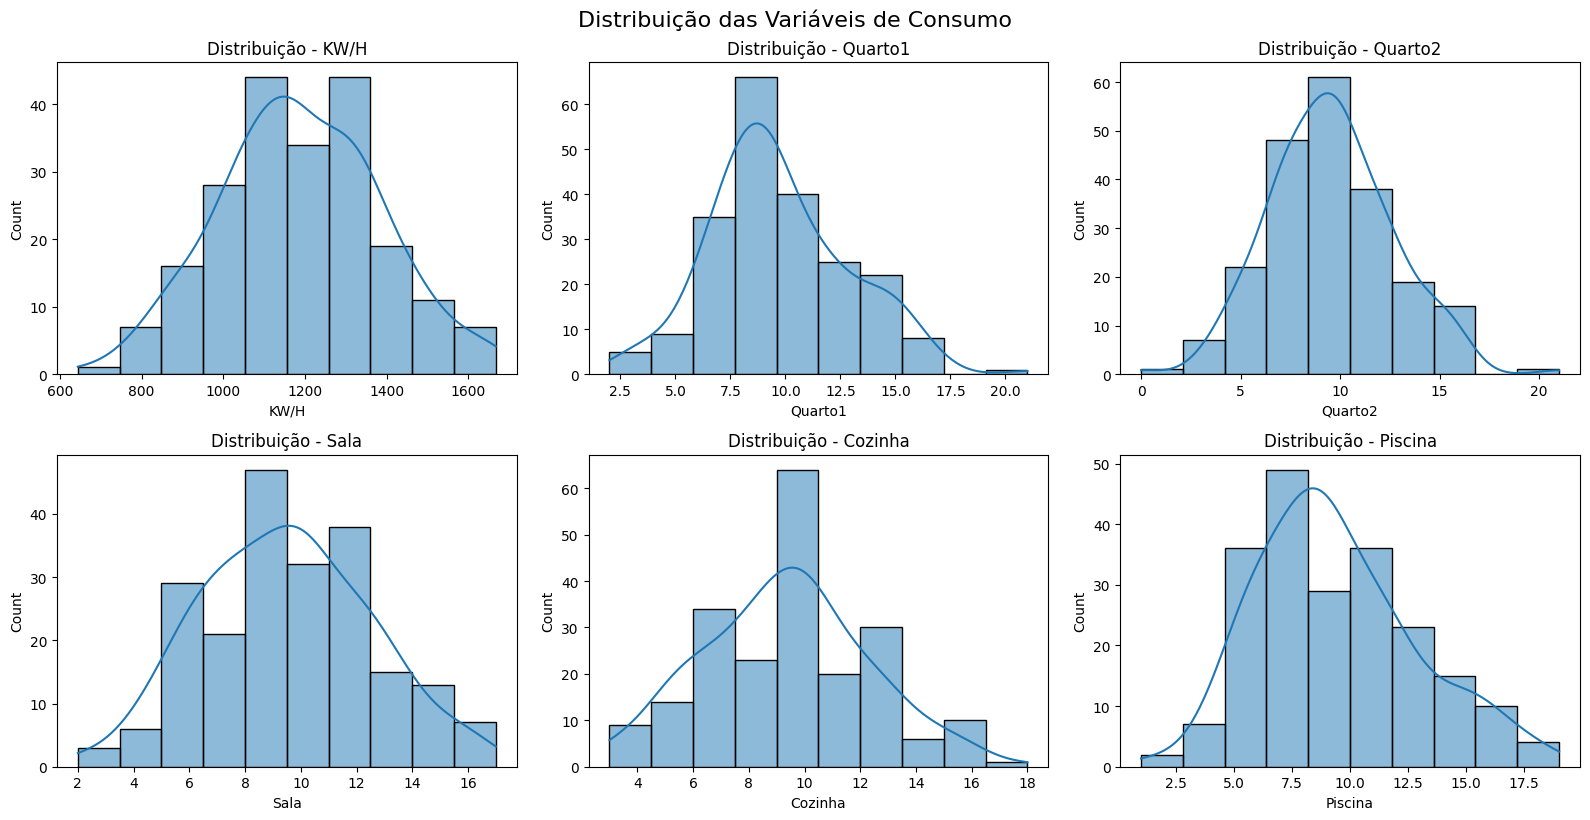

(              KW/H     Quarto1     Quarto2        Sala     Cozinha     Piscina
 count   211.000000  211.000000  211.000000  211.000000  211.000000  211.000000
 mean   1188.317536    9.687204    9.549763    9.445498    9.322275    9.383886
 std     197.439318    3.176817    3.073874    3.033247    2.969757    3.436433
 min     644.000000    2.000000    0.000000    2.000000    3.000000    1.000000
 25%    1057.000000    8.000000    7.000000    7.000000    7.000000    7.000000
 50%    1176.000000    9.000000    9.000000    9.000000    9.000000    9.000000
 75%    1324.000000   12.000000   11.500000   12.000000   11.000000   11.000000
 max    1667.000000   21.000000   21.000000   17.000000   18.000000   19.000000,
              KW/H   Quarto1   Quarto2      Sala   Cozinha   Piscina
 KW/H     1.000000  0.521439  0.418033  0.548475  0.409667  0.427213
 Quarto1  0.521439  1.000000  0.060606  0.169207  0.071809  0.064704
 Quarto2  0.418033  0.060606  1.000000  0.038469  0.049356  0.012383
 Sa

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapeamento de abreviações de meses em português para números
meses_pt = {
    'jan': '01', 'fev': '02', 'mar': '03', 'abr': '04',
    'mai': '05', 'jun': '06', 'jul': '07', 'ago': '08',
    'set': '09', 'out': '10', 'nov': '11', 'dez': '12'
}

# The 'Data' column is already in datetime format from a previous step,
# so we can remove the date conversion lines.
# df['Data'] = df['Data'].astype(str)
# df['Data'] = df['Data'].str.lower().replace(meses_pt, regex=True)
# df['Data'] = pd.to_datetime(df['Data'] + '/2025', format='%d/%m/%Y')

# Estatísticas descritivas
summary = df.describe()

# Correlação entre as variáveis
correlation = df.corr(numeric_only=True)

# Visualização: histograma das variáveis
cols_to_plot = df.columns[1:]  # Ignora a coluna 'Data'
n_cols = len(cols_to_plot)
n_rows = (n_cols + 2) // 3  # 3 colunas por linha

fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=10)
    axes[i].set_title(f'Distribuição - {col}')
    axes[i].set_xlabel(col)

# Remove axes não usados, se houver
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Distribuição das Variáveis de Consumo", fontsize=16, y=1.02)
plt.show()

summary, correlation

📈 Resumo Estatístico das Variáveis
Média de consumo diário: 1188,3 kWh

Máximo: 1667 kWh, Mínimo: 644 kWh

Cômodos mais acionados:

Quarto1: média de 9,7 vezes/dia

Cozinha e Piscina: ~9,3 vezes/dia

Sala tem a maior variação de uso (até 17 vezes/dia)

Os dados estão bem distribuídos — sem grandes distorções ou outliers evidentes.

📊 Correlação com o consumo total (KW/H):
Sala tem a maior correlação com o consumo total: 0.55

Depois vêm Quarto1 (0.52) e Piscina (0.43)

Quarto2 e Cozinha também influenciam, mas com menor peso.

A Cozinha tem correlação negativa com a Piscina (-0.08), sugerindo uso alternado em alguns dias.

🧠 Insights de Ciência de Dados + Negócio
Você pode construir um modelo de regressão linear para prever o consumo com base nas ativações por cômodo.

Uma clusterização K-means também pode separar dias em grupos de uso leve, moderado e intenso — ótimo para personalizar alertas ou otimizar tarifas.

Do ponto de vista ESG e Smart City, esses dados podem orientar:

Campanhas educativas por cômodo (ex: “Uso consciente da sala”)

Automação via IoT (ex: alertas quando uso da piscina exceder padrão)

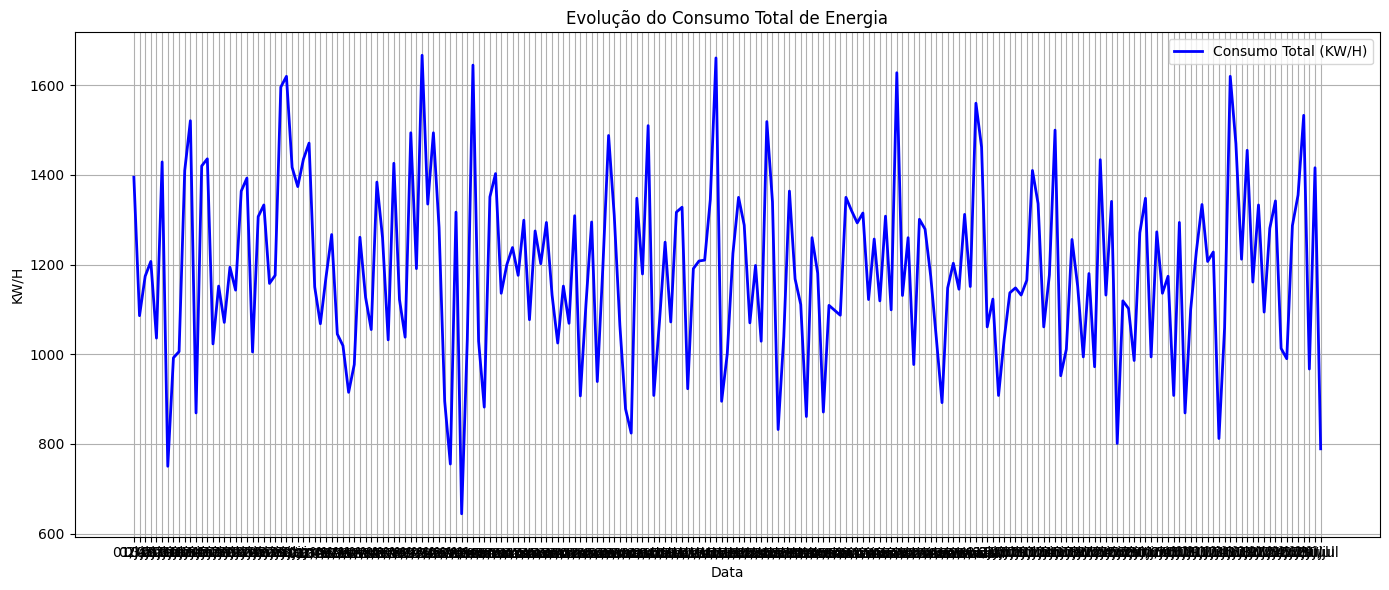

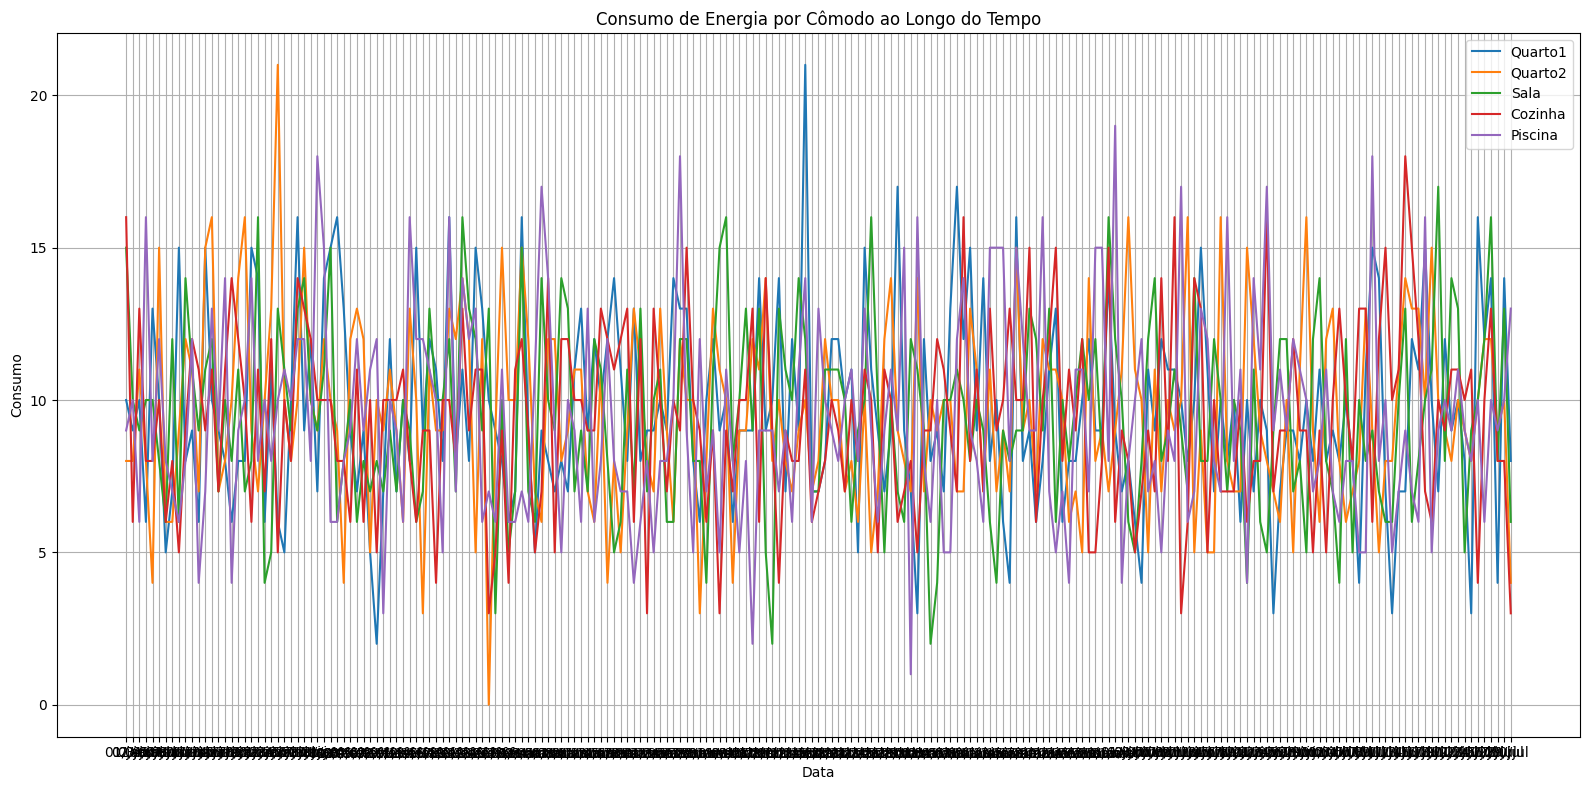

In [21]:
# Plotar consumo total ao longo do tempo
plt.figure(figsize=(14, 6))
plt.plot(df['Data'], df['KW/H'], label='Consumo Total (KW/H)', color='blue', linewidth=2)
plt.title('Evolução do Consumo Total de Energia')
plt.xlabel('Data')
plt.ylabel('KW/H')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Agora plotar o consumo por cômodo no mesmo gráfico, para comparar
plt.figure(figsize=(16, 8))
for comodo in ['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina']:
    plt.plot(df['Data'], df[comodo], label=comodo)

plt.title('Consumo de Energia por Cômodo ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Consumo')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
# Definir variáveis preditoras (X) e variável alvo (y)
X = df[['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina']]
y = df['KW/H']

# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predição
y_pred = modelo.predict(X_test)

# Avaliação do modelo
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print("Erro médio absoluto (MAE):", mean_absolute_error(y_test, y_pred))
print("R² (coeficiente de determinação):", r2_score(y_test, y_pred))

Coeficientes: [23.36409077 23.15884869 25.79029969 23.48572963 24.44823671]
Intercepto: 49.886394002345696
Erro médio absoluto (MAE): 57.743376101762394
R² (coeficiente de determinação): 0.8638797274963957


📌 Resultados do Modelo

✅ Coeficientes:

Sala: +25.79 → maior impacto no consumo total

Piscina: +24.45

Cozinha: +23.49

Quarto1 / Quarto2: também relevantes, cerca de +23.3 e +23.1

Isso indica que cada vez que um ambiente é utilizado, o consumo estimado aumenta cerca de 23 a 26 kWh, com a sala sendo a mais impactante.

🎯 Intercepto:

49.88 kWh: o consumo base estimado mesmo com zero ativações — pode refletir consumo contínuo (geladeiras, standby etc.)

📉 Erro Médio Absoluto (MAE):

57.74 kWh → baixo em relação à média total (~1188 kWh), indicando boa precisão.

📈 R² (Coeficiente de determinação):

0.86 → o modelo explica 86% da variação no consumo, um valor muito bom para aplicações práticas.



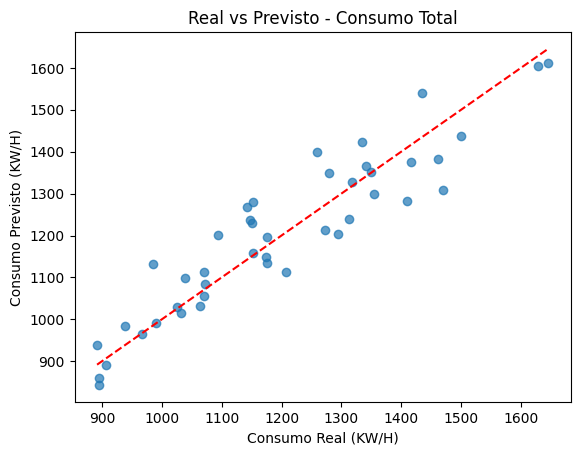

In [23]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Linha identidade
plt.xlabel('Consumo Real (KW/H)')
plt.ylabel('Consumo Previsto (KW/H)')
plt.title('Real vs Previsto - Consumo Total')
plt.show()

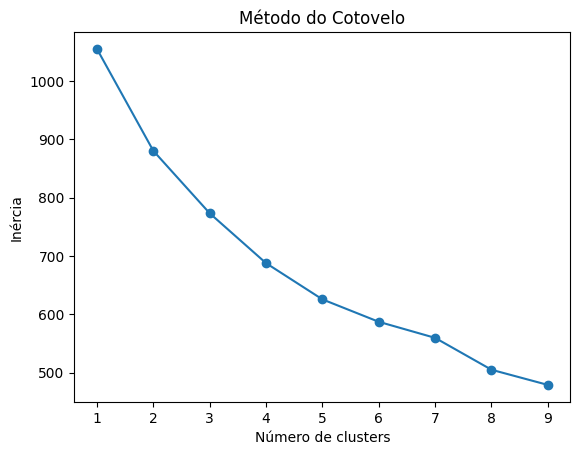

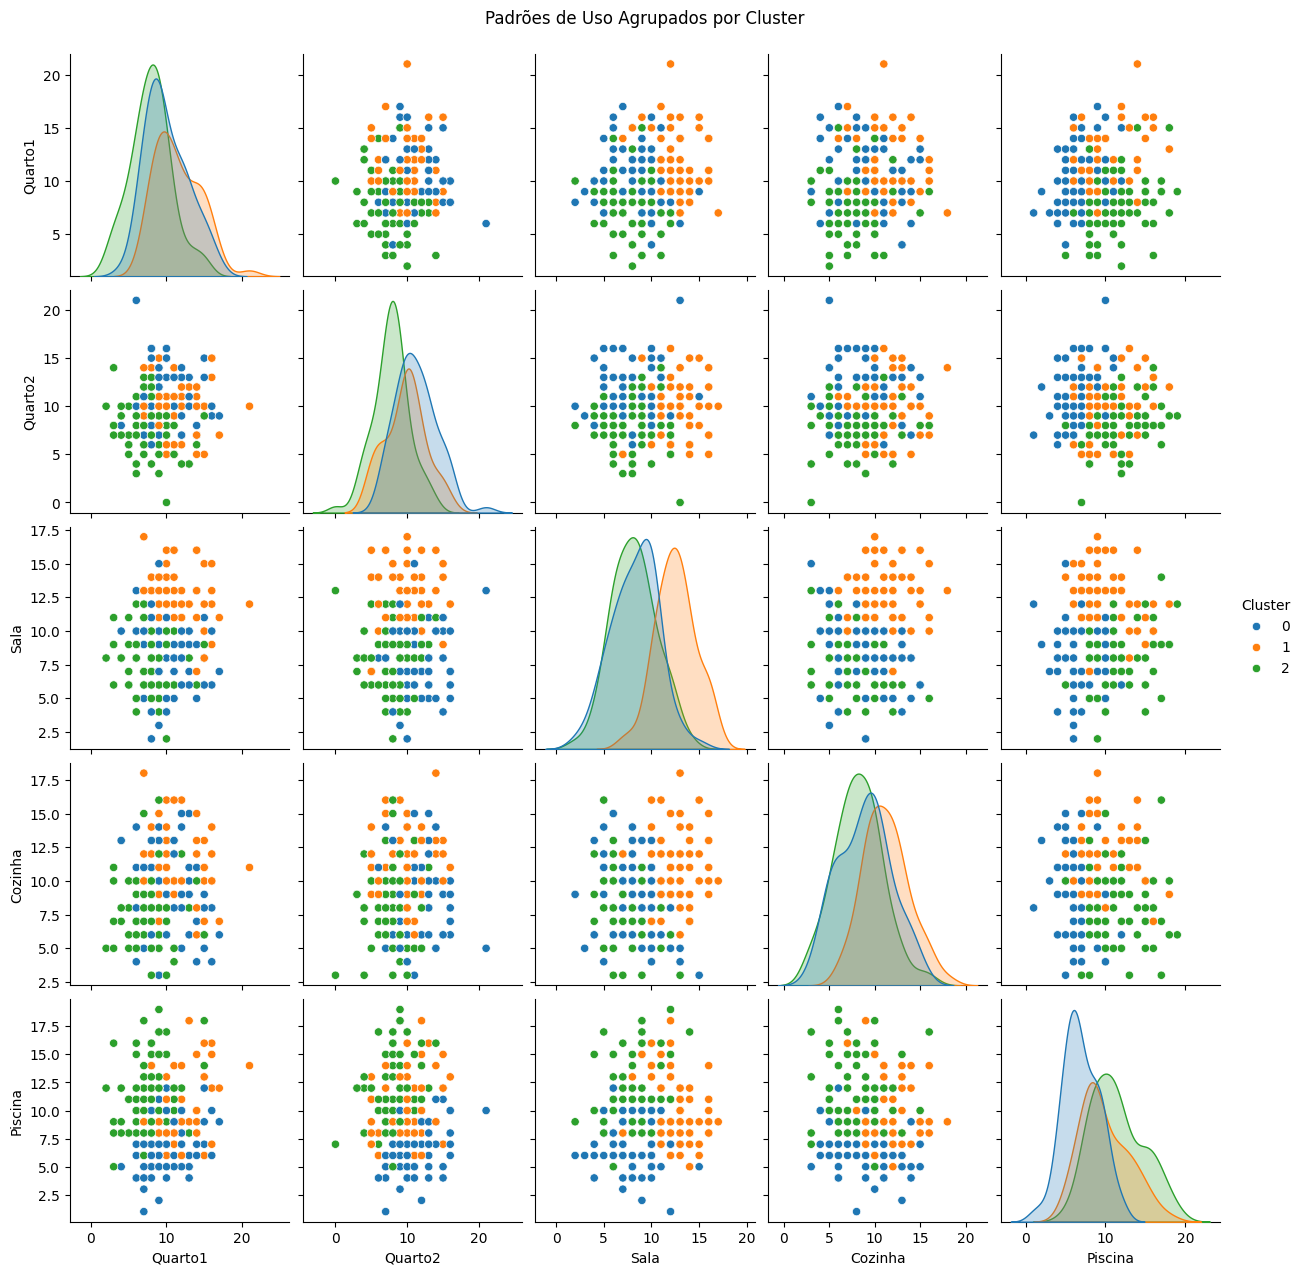

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Dados usados na clusterização
X = df[['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina']]

# Normalização (fundamental para KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encontrar número ideal de clusters (opcional)
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.show()

# Aplicar KMeans com 3 clusters (ajuste conforme o gráfico do cotovelo)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualização
sns.pairplot(df, hue='Cluster', vars=['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina'], palette='tab10')
plt.suptitle("Padrões de Uso Agrupados por Cluster", y=1.02)
plt.show()

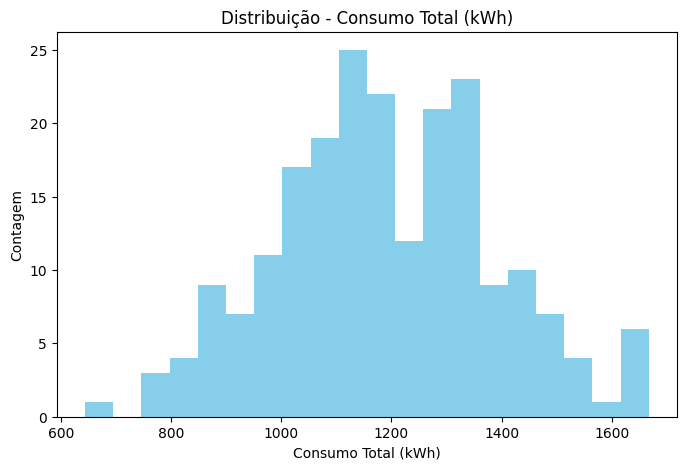

In [25]:
plt.figure(figsize=(8, 5))
plt.hist(df['KW/H'], bins=20, color='skyblue')
plt.title('Distribuição - Consumo Total (kWh)')
plt.xlabel('Consumo Total (kWh)')
plt.ylabel('Contagem')
plt.show()


In [26]:
# === PERFIL DE CADA CLUSTER ===
perfil_clusters = df.groupby('Cluster')[['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina', 'KW/H']].mean()

def nomear_cluster(row):
    media_kw = df['KW/H'].mean()

    # Consumo total
    if row['KW/H'] < media_kw * 0.75:
        consumo_total = '🔵 Baixo Consumo'
    elif row['KW/H'] > media_kw * 1.25:
        consumo_total = '🔴 Alto Consumo'
    else:
        consumo_total = '🟡 Consumo Equilibrado'

    # Verificar cômodos com consumo alto
    altos = []
    for comodo in ['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina']:
        if row[comodo] > df[comodo].mean() * 1.2:  # 20% acima da média daquele cômodo
            altos.append(comodo)

    # Montar nome do cluster com base nos cômodos de alto consumo
    if consumo_total == '🔵 Baixo Consumo':
        return consumo_total

    if consumo_total == '🟡 Consumo Equilibrado' and len(altos) == 0:
        return consumo_total

    if consumo_total == '🟡 Consumo Equilibrado' and len(altos) > 0:
        return f"🟠 Consumo Elevado em {', '.join(altos)}"

    if consumo_total == '🔴 Alto Consumo':
        if len(altos) == 0:
            return consumo_total
        else:
            return f"🔴 Alto Consumo (Em {', '.join(altos)})"

perfil_clusters['Perfil'] = perfil_clusters.apply(nomear_cluster, axis=1)

# Mapeamento para chaves base do dicionário recomendacoes
def mapear_perfil_para_chave(perfil):
    if perfil == '🔵 Baixo Consumo':
        return perfil
    if perfil == '🟡 Consumo Equilibrado':
        return perfil
    if perfil.startswith('🟠 Consumo Elevado'):
        # Aqui você pode escolher um nome genérico ou identificar cômodo específico
        # Por exemplo, se só quiser geral:
        return '🟠 Consumo Elevado'
    if perfil.startswith('🔴 Alto Consumo'):
        # Pode mapear por cômodos mais frequentes ou usar geral
        # Vamos tentar diferenciar por cômodo principal (primeiro da lista)
        # Exemplo de extração do primeiro cômodo:
        import re
        encontrados = re.findall(r'\b\w+\b', perfil)  # pega palavras
        # Pegando o primeiro cômodo após "Em"
        if 'Em' in perfil:
            idx = perfil.index('Em') + 3
            # extrair o texto depois de "Em "
            texto = perfil[idx:]
            principal = texto.split(',')[0].strip()
            if principal == 'Sala' or principal == 'Piscina':
                return '🔴 Alto Consumo (Sala/Piscina)'
            elif principal == 'Cozinha':
                return '🔴 Alto Consumo (Cozinha)'
            else:
                return '🔴 Alto Consumo'
        else:
            return '🔴 Alto Consumo'
    return perfil  # fallback

recomendacoes = {
    '🔵 Baixo Consumo': [
        "✅ Manter boas práticas já adotadas.",
        "🎁 Oferecer recompensas ou descontos (gamificação).",
        "🔋 Incentivar uso de energia solar / microgeração."
    ],
    '🟡 Consumo Equilibrado': [
        "🔌 Automatizar desligamento de equipamentos em horários fixos.",
        "🕵️ Instalar sensores de presença em quartos e sala.",
        "📊 Enviar relatórios semanais de uso comparativo."
    ],
    '🟠 Consumo Elevado': [
        "🛏️ Automatizar luzes e eletrônicos nos cômodos com consumo elevado.",
        "🕵️ Instalar sensores de presença específicos para os cômodos.",
        "📊 Acompanhar o uso para identificar picos desnecessários."
    ],
    '🔴 Alto Consumo (Sala/Piscina)': [
        "💧 Agendar funcionamento da bomba da piscina fora do pico.",
        "💡 Incentivar uso consciente da iluminação e eletrônicos.",
        "🧠 Sugerir automação e adesão à tarifa branca."
    ],
    '🔴 Alto Consumo (Cozinha)': [
        "🍳 Verificar equipamentos de cozinha para consumo excessivo.",
        "⏰ Controlar horários de uso de forno e geladeira.",
        "💡 Incentivar uso eficiente da iluminação."
    ]
}

# Exibir os perfis e recomendações
for cluster_id, row in perfil_clusters.iterrows():
    print(f"\n=== Cluster {cluster_id} - {row['Perfil']} ===")
    print("📊 Perfil médio:")
    print(row[['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina', 'KW/H']])
    print("\n💡 Recomendações:")

    chave = mapear_perfil_para_chave(row['Perfil'])

    if chave in recomendacoes:
        for item in recomendacoes[chave]:
            print("-", item)
    else:
        print("- Sem recomendações específicas para este perfil.")



=== Cluster 0 - 🟡 Consumo Equilibrado ===
📊 Perfil médio:
Quarto1           10.0
Quarto2      11.186667
Sala          8.253333
Cozinha       8.893333
Piscina       6.933333
KW/H       1129.986667
Name: 0, dtype: object

💡 Recomendações:
- 🔌 Automatizar desligamento de equipamentos em horários fixos.
- 🕵️ Instalar sensores de presença em quartos e sala.
- 📊 Enviar relatórios semanais de uso comparativo.

=== Cluster 1 - 🟠 Consumo Elevado em Sala, Cozinha ===
📊 Perfil médio:
Quarto1      11.459016
Quarto2       9.737705
Sala         12.508197
Cozinha      11.229508
Piscina       9.885246
KW/H       1368.131148
Name: 1, dtype: object

💡 Recomendações:
- 🛏️ Automatizar luzes e eletrônicos nos cômodos com consumo elevado.
- 🕵️ Instalar sensores de presença específicos para os cômodos.
- 📊 Acompanhar o uso para identificar picos desnecessários.

=== Cluster 2 - 🟠 Consumo Elevado em Piscina ===
📊 Perfil médio:
Quarto1     7.933333
Quarto2         7.76
Sala        8.146667
Cozinha          8.

# Relatório de Perfis de Consumo por Cluster

---

## === Cluster 0 - 🟡 Consumo Equilibrado ===

### 📊 Perfil médio:
| Ambiente  | Consumo Médio (kWh) |
| --------- | ------------------- |
| Quarto1   | 10.00               |
| Quarto2   | 11.19               |
| Sala      | 8.25                |
| Cozinha   | 8.89                |
| Piscina   | 6.93                |
| **Total (KW/H)** | **1129.99**      |

### 💡 Recomendações:
- 🔌 Automatizar desligamento de equipamentos em horários fixos.
- 🕵️ Instalar sensores de presença em quartos e sala.
- 📊 Enviar relatórios semanais de uso comparativo.

---

## === Cluster 1 - 🟠 Consumo Elevado em Sala, Cozinha ===

### 📊 Perfil médio:
| Ambiente  | Consumo Médio (kWh) |
| --------- | ------------------- |
| Quarto1   | 11.46               |
| Quarto2   | 9.74                |
| Sala      | 12.51               |
| Cozinha   | 11.23               |
| Piscina   | 9.89                |
| **Total (KW/H)** | **1368.13**      |

### 💡 Recomendações:
- 🛏️ Automatizar luzes e eletrônicos nos cômodos com consumo elevado.
- 🕵️ Instalar sensores de presença específicos para os cômodos.
- 📊 Acompanhar o uso para identificar picos desnecessários.

---

## === Cluster 2 - 🟠 Consumo Elevado em Piscina ===

### 📊 Perfil médio:
| Ambiente  | Consumo Médio (kWh) |
| --------- | ------------------- |
| Quarto1   | 7.93                |
| Quarto2   | 7.76                |
| Sala      | 8.15                |
| Cozinha   | 8.20                |
| Piscina   | 11.43               |
| **Total (KW/H)** | **1100.40**      |

### 💡 Recomendações:
- 💧 Monitorar o uso da piscina e bombas.
- ⏰ Programar horários eficientes para funcionamento.
- 💡 Incentivar uso consciente da iluminação externa.

---

*Fim do relatório.*
